<a href="https://www.facebook.com/codemakerz"><img src="https://scontent.ffjr1-4.fna.fbcdn.net/v/t1.0-9/36189148_736466693143793_2172101683281133568_n.png?_nc_cat=107&_nc_eui2=AeHzxv3SUcQBOfijLP-cEnHkX4z9XQXdeau__2MlErWZ1x07aZ1zx1PzJUDDxL6cpr7oPqYiifggXDptgtP8W5iCoDRjcdILDBYZ5Ig40dqi8Q&_nc_oc=AQmMCNXdzelFB2rdtpk8wN8nC410Wm2yKupYfYS1FxHNejTF0Jhr1G3WIZORKRF3TvFpohMB8Puw29Txxan8CW05&_nc_ht=scontent.ffjr1-4.fna&oh=7b13627e991a4d1b508923041bd7bc22&oe=5D8A7B03" />
</a>

Follow Us:
Facebook: https://www.facebook.com/codemakerz



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['class.csv', 'zoo.csv']


In [2]:
df_class = pd.read_csv("../input/class.csv")
df_animals = pd.read_csv("../input/zoo.csv")

In [3]:
df_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [4]:
# We have 7 different class in class.csv. These classes are the species class of the animals.
df_class.Class_Number.unique()

array([1, 2, 3, 4, 5, 6, 7])

In [5]:
# Every animal has a class from class.csv
df_animals.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
#df_animals.loc[:, ["milk", "backbone", "toothed", "venomous", "domestic", "aquatic"]].shape

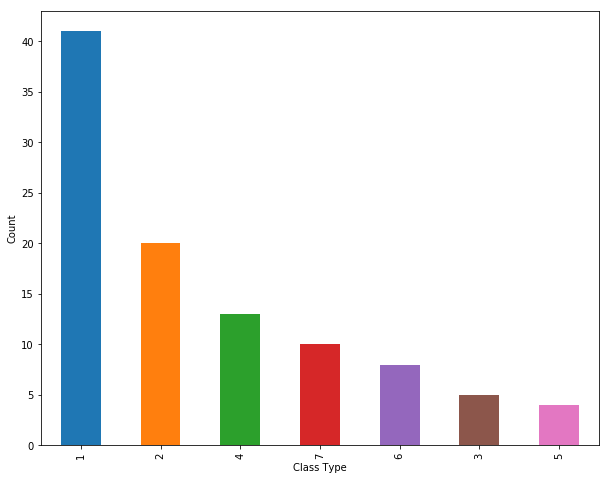

In [7]:
# Class wise animal counts.
# We can see, mostly animals belong to the class 1 which is Mammal.
plt.figure(figsize=(10,8));
df_animals.class_type.value_counts().plot(kind="bar");
plt.xlabel('Class Type');
plt.ylabel("Count");
plt.plot();

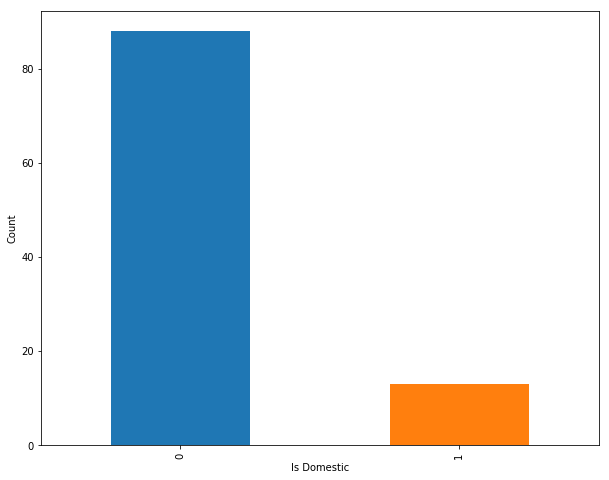

In [8]:
# Lets plot how many animals are domestic or not
plt.figure(figsize=(10,8));
df_animals.domestic.value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot();

In [9]:
# So we can see mostly animals are not domestic.

In [10]:
pd.crosstab(df_animals.class_type, df_animals.domestic)

domestic,0,1
class_type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


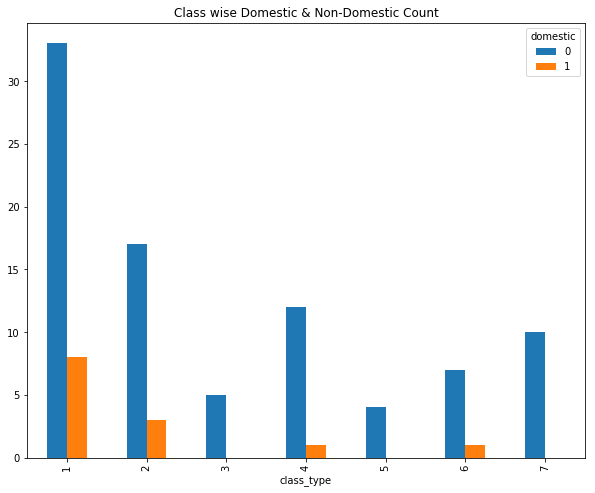

In [11]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(df_animals.class_type, df_animals.domestic).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [12]:
# We can see mammals class has most number of domestic animals, which is a kind of true if you will see around
# you. Mostly domestic animals are mammals like dogs, cats, cows, pigs.

In [13]:
# Lets see how many animals provides us milk
df_animals.milk.value_counts()

0    60
1    41
Name: milk, dtype: int64

In [14]:
# So there are 41 animals in the list which provides us milk. Lets see to which category they belongs

In [15]:
pd.crosstab(df_animals.class_type, df_animals.milk)

milk,0,1
class_type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


In [16]:
# So we can observer here only mammals provides milk, which is really a scientific true. 
# that mean our data exploration is going good till now.. CONGRATS !!!

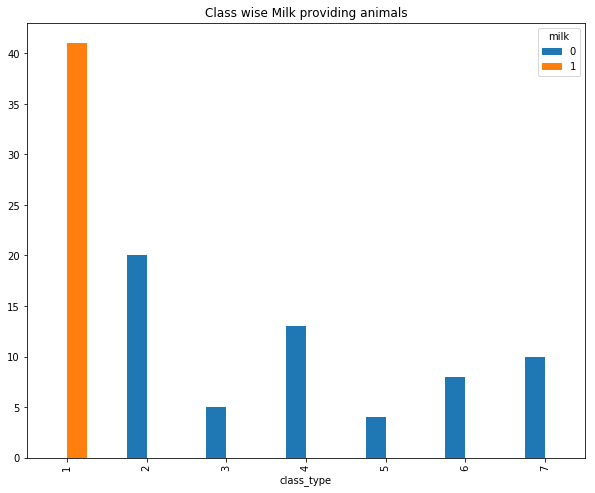

In [17]:
pd.crosstab(df_animals.class_type, df_animals.milk).plot(kind="bar", title="Class wise Milk providing animals", figsize=(10, 8));

In [18]:
# We can see mammal bar is orange (milk = 1), this shows all the mammals in our list provides milk.
# And no othere class animals gives us milk, Actually our plot really makes sense.
# lets find is it correct.
df_animals[(df_animals.milk==1)].shape[0]

41

In [19]:
df_animals[df_animals.class_type == 1].shape[0]

41

In [20]:
# So yes we can see milk animals and mammals have equal numbers and all animals who provide milk belong to 
# mammal category. 

In [21]:
# Lets see how many animals live under water. i.e aquatic
# lets find out all the aquatic animals.
df_animals.aquatic.value_counts() # only 36 aquatic animals are there.
# lets see there class.

0    65
1    36
Name: aquatic, dtype: int64

In [22]:
df_animals[df_animals.aquatic==1].class_type.value_counts()

4    13
7     6
2     6
1     6
5     4
3     1
Name: class_type, dtype: int64

In [23]:
# We can see mostly aquatic animals are fish means class 4, but wait we have few animals with 
# class 7, 2, 1, 5, 3
# and still they have fins. 
# Lets find out is it a wrong data or what?


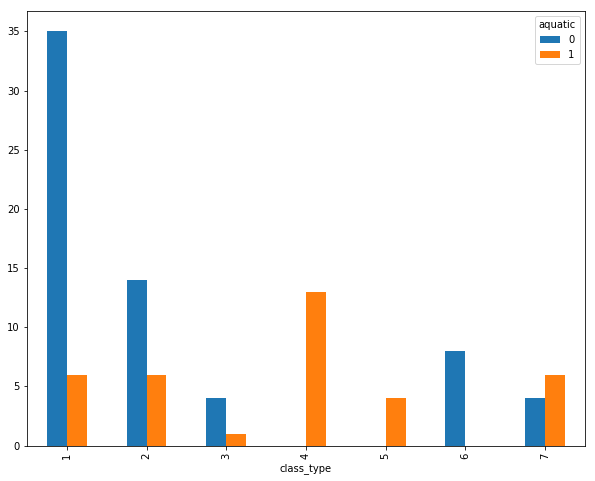

In [24]:
# Lets plot category wise animals having fins
pd.crosstab(df_animals.class_type, df_animals.aquatic).plot(kind="bar", figsize=(10, 8));

In [25]:
# AMAZING NATURE...!!!

In [26]:
# What about venomous?
df_animals.venomous.value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [27]:
# In our dataset we have 8 venomous. Lets see their class
pd.crosstab(df_animals.class_type, df_animals.venomous)

venomous,0,1
class_type,,
1,41,0
2,20,0
3,3,2
4,12,1
5,3,1
6,6,2
7,8,2


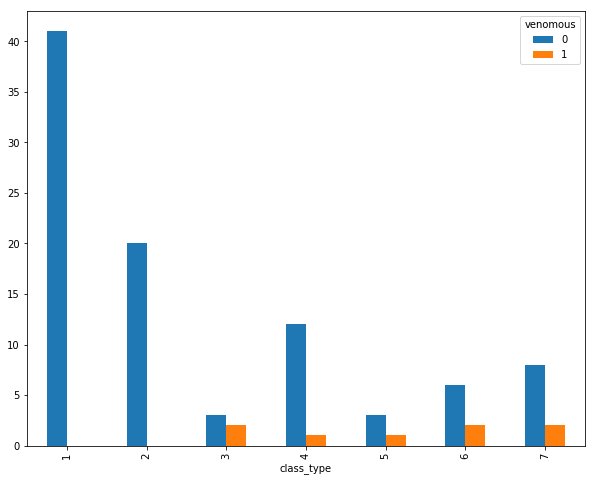

In [28]:
# As per our data we have 2 repltiles which are venomous and , 1 fish and other class types
pd.crosstab(df_animals.class_type, df_animals.venomous).plot(kind="bar", figsize=(10, 8))

In [29]:
# From above plot, we know that no mammals and birds are venomous. So thank god you can hug them.
# but better watch your back before mammal kick your... !@#

In [30]:
# So enough EDA i guess, You can also practice few like:
# find out the venomous fish.
# find out venomous reptiles.
# find out venomous animal which gives egg or milk or any kind of data.

## Machine Learning Model

'''
For this classfication we will use KNN classification. I will not explain the complete concept of KNN here.
But a brief explanation is enough to give you and idea. 
Lets take a real life example. Suppose there are two basket B1 & B2. B1 has 80% RED BALLS, B2 has 90% BLACK BALLS.
Now when your friend tells you to get one ball with your eyes covered from B1 & ask you which color it can be?
SO in this case, your mind thins in a programmed way. It thinks B1 has mostly RED BALLS, so probably the
ball will be red. 
So what your mind analyzed? 
Basically your mind analyzed the probability of ball being red and black. But our ball was form B1 so the
probability of being RED was more. Which you calculated according to the number of other balls already presented
in the basket 1. You can other balls were neighbour of the ball which you drew. So most of the neighbours of the
ball which you drew were RED, so you said it must be red. 

KNN works in the same way, when you try to predict the category of a point(which we call classification), it first finds out its neighbour. By 
default it consider 5 nearest points(neighbour) and find out the category of all the points. then it find out
which category has most number of points and assign it to the new point. By default KNN algo takes 5 neighbour.
But you can change according to your algorithmm and case. That is why KNN decision boundary mostly not 
linear as Logistic regression. KNN is a type of Non-Linear classification.
'''

## Create Feature & Target Matrix

In [31]:
df_animals.shape

(101, 18)

In [32]:
#X = df_animals.iloc[:, 1: 17].values
X=df_animals.loc[:, ["milk", "backbone", "toothed", "venomous", "domestic", "aquatic"]].values

In [33]:
y = df_animals.iloc[:, 17].values

In [34]:
y.shape

(101,)

In [35]:
X.shape

(101, 6)

## Split Data Into Train & Test Set

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Create Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
clf = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2) 
# n_neighbors: number of neighbors. Default is 5
# metric="minkowski", p=2: will calculate distance as eucledian distance formula

## Train Model

In [40]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predict Data

In [41]:
y_pred = clf.predict(X_test)

In [42]:
y_pred # here you can see our model predict the class of the animal for the test data.

array([4, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 6, 4, 6, 1, 6, 2, 4, 2, 3,
       1, 2, 1, 1])

## Model Evaluation

### Accuracy

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [44]:
print("Accuracy of KNN Regression:",accuracy_score(y_test, y_pred))

Accuracy of KNN Regression: 0.9230769230769231


In [45]:
# So we can see we have an accuracy of 92% which is very good


# Lets quickly compare with Logistic regression classifier

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
clf_log = LogisticRegression(random_state=0)

In [48]:
clf_log.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_pred_log = clf_log.predict(X_test)

In [50]:
print("Accuracy of Logistic Regression Classifier:",accuracy_score(y_test, y_pred_log))

Accuracy of Logistic Regression Classifier: 0.9230769230769231


So we can see our both the classfier showing same accuracy but it may not be the case always. Try with someother data and try to change columns or change the number of neighbor in KNN Classifier & see how it affect the accuracy of model.

Thank you !! Thats for now. We will be keep updating this notebook. Upvote and share if you liked it.